In [17]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df= pd.read_csv("spambase.csv")

In [19]:
dataset = pd.read_csv

In [20]:
df.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [21]:
df.shape

(4601, 59)

 Dataset contains 4601 observations (rows) and 59 features (columns). The number of attributes is 58 (57 continuous and 1 nominal class label).
 Additional information obtained from "spambase_documentation" shows that spam constitutes 39.4% (1813 emails), while 2788 email are not spam (60.6%). 
 The attributes are continuous (attributes of type word_freq_WORD, attributes of type char_freq_CHAR and attributes of type capital_run_lenght) and also categorical (last feature -indicator "is_spam" which is a binary attribute)

This data shows the characteristics of emails based on their attributes Iword_freq,char_freq and capital_run_lenght). This characteristic is very important for identifying spam ( due to repeated charcters of words or frequent use of capital letters we can ditinguish spam from regular email).
We can also compare the diffrences between spam and non-spam. 

I would like to rename first column "Unnamed:0" to "ID"


In [22]:
df = df.rename(columns={"Unnamed: 0":"ID"})

In [23]:
df.head()

,ID,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


I decided to remove column "ID" because this column is not relevant

In [24]:
df = df.drop(["ID"],axis=1)

In [25]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [26]:
df.shape

(4601, 58)

Number of columns decreased from 59 to 58)

In [27]:
import seaborn as sns

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4595 non-null   float64
 3   word_freq_3d                4599 non-null   float64
 4   word_freq_our               4601 non-null   object 
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4586 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [30]:
df.isnull().sum()

word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab                   0
word_freq_labs

Using this formula (df.isnull().sum()) I got information about missing data

In [32]:
df["word_freq_all"].unique()

array([0.64, 0.5 , 0.71, 0.  , 0.46, 0.77, 0.25, 0.34, 1.42, 0.42, 0.55,
       0.1 , 3.03, 2.56, 0.48, 1.66, 1.05, 0.18, 0.99, 0.26, 1.09, 0.73,
       1.26, 0.45, 1.68, 0.47, 0.12, 0.66, 0.61, 0.53, 0.89, 0.94, 1.77,
       0.37, 0.2 , 0.23, 0.72, 1.28, 0.38, 1.12, 0.29, 0.7 , 0.43, 1.24,
       0.76, 0.63, 1.02, 0.4 , 0.8 , 0.67, 0.41, 0.39, 0.33, 1.38, 0.27,
       0.56, 0.62, 0.68, 0.35, 2.38, 0.08, 1.  , 0.54, 1.32, 0.87, 1.08,
       1.07, 1.31, 0.22, 0.15, 0.52, 0.32, 0.16, 1.1 , 0.65, 1.43, 0.81,
       0.69, 0.58, 0.57, 0.14, 0.6 , 0.85, 1.63, 0.86, 0.17, 1.53, 1.29,
       0.19, 0.05, 1.45, 1.34, 1.35, 1.22, 0.31, 0.36, 1.33, 0.93, 0.59,
       0.11, 1.16, 0.03, 0.51, 0.49, 1.56, 1.11, 0.91, 1.44, 0.88, 1.92,
       0.09, 0.24, 1.25, 0.3 , 1.18, 0.28, 1.81, 0.84, 0.78, 0.75, 0.13,
       1.01, 0.9 , 1.47, 0.44, 0.98, 1.72, 1.23, 1.7 , 2.22, 1.65, 1.64,
       0.74, 0.95, 0.82, 0.97, 1.5 , 1.51, 1.17, 0.92, 1.13, 2.99, 0.04,
       1.62, 1.58, 1.9 , 1.83, 1.85, 1.61, 1.4 , 1.

Column word_freq_all : 6 missing data and no malformed values

In [33]:
df["word_freq_3d"].unique()

array([0.000e+00, 5.200e-01, 1.600e-01, 1.900e-01, 4.200e-01, 9.500e-01,
       1.700e-01, 5.030e+00, 7.180e+00, 1.363e+01, 8.100e-01, 1.160e+00,
       1.260e+00, 1.000e-01, 4.900e-01, 1.910e+00, 4.013e+01, 9.100e-01,
       9.160e+00, 4.310e+00, 4.281e+01, 1.916e+01, 6.000e-02, 3.546e+01,
       4.273e+01, 5.800e-01, 4.400e-01, 7.070e+00, 1.330e+00, 1.290e+00,
       2.100e-01, 1.973e+01, 5.700e-01, 6.000e-01, 4.000e-02, 1.350e+00,
       1.100e-01, 1.400e-01, 1.500e-01, 8.700e-01, 1.300e-01, 5.500e-01,
             nan, 3.100e-01])

Column word_freq_3d : 2 missing data (nan) and no malformed values

In [34]:
df["word_freq_over"].unique()

array([0.  , 0.28, 0.19, 0.32, 0.25, 0.35, 0.31, 0.05, 0.27, 0.92, 0.36,
       0.99, 0.12, 0.33, 0.73, 1.26,  nan, 0.46, 0.2 , 1.28, 0.76, 0.13,
       0.03, 0.6 , 0.64, 0.79, 0.16, 0.41, 0.4 , 0.66, 0.81, 0.39, 0.45,
       0.85, 0.29, 0.08, 0.78, 0.43, 0.87, 0.53, 0.56, 0.22, 0.42, 0.62,
       0.65, 0.54, 0.55, 1.12, 2.3 , 0.57, 0.1 , 0.17, 0.94, 0.7 , 0.18,
       0.34, 0.93, 0.51, 0.74, 0.44, 1.02, 0.48, 0.68, 0.11, 1.2 , 0.09,
       0.47, 0.61, 2.1 , 0.3 , 1.05, 1.29, 1.01, 0.84, 0.38, 0.98, 0.86,
       1.88, 1.32, 0.8 , 1.27, 1.1 , 0.23, 0.24, 0.15, 0.95, 0.63, 0.58,
       0.71, 0.37, 0.21, 0.67, 0.72, 1.14, 0.04, 0.5 , 0.14, 0.69, 0.91,
       0.9 , 0.59, 1.47, 1.61, 0.52, 1.25, 1.09, 1.86, 2.54, 0.77, 0.26,
       0.49, 1.49, 1.36, 1.4 , 1.21, 1.64, 1.04, 1.06, 1.11, 0.96, 2.43,
       0.06, 2.94, 0.75, 0.01, 0.07, 1.34, 0.02, 0.82, 1.19, 1.  , 1.07,
       2.63, 1.03, 5.88, 1.63, 3.44, 1.17, 0.89, 3.57, 1.57, 1.42])

Column word_freq_over : 1 missing data (nan) and no malformed values

In [35]:
df["word_freq_internet"].unique()

array([0.000e+00, 7.000e-02, 1.200e-01, 6.300e-01, 1.850e+00, 1.880e+00,
       3.500e-01,       nan, 2.000e-02, 2.450e+00, 5.200e-01, 1.810e+00,
       6.000e-02, 2.800e-01, 3.300e-01, 1.090e+00, 1.100e+00, 9.300e-01,
       3.600e-01, 1.260e+00, 2.500e-01, 1.450e+00, 1.860e+00, 2.600e-01,
       1.400e-01, 4.600e-01, 5.000e-01, 5.000e-02, 1.280e+00, 1.900e-01,
       8.400e-01, 1.200e+00, 4.000e-01, 2.980e+00, 1.310e+00, 2.900e-01,
       4.200e-01, 2.340e+00, 2.040e+00, 1.120e+00, 4.500e-01, 4.400e-01,
       1.700e-01, 1.300e-01, 3.200e-01, 5.900e-01, 4.300e-01, 2.240e+00,
       7.100e-01, 2.700e-01, 6.000e-01, 6.200e-01, 8.900e-01, 2.300e-01,
       1.050e+00, 6.400e-01, 1.800e-01, 1.410e+00, 3.400e-01, 3.700e-01,
       6.700e-01, 1.290e+00, 9.100e-01, 8.000e-02, 2.020e+00, 1.100e-01,
       5.800e-01, 1.360e+00, 2.100e-01, 1.070e+00, 4.800e-01, 2.530e+00,
       1.080e+00, 4.700e-01, 5.300e-01, 4.900e-01, 3.330e+00, 2.960e+00,
       2.820e+00, 4.620e+00, 2.000e-01, 1.000e-01, 

Column word_freq_internet : 15 missing data (nan) and no malformed values

In [36]:
df["word_freq_labs"].unique()

array([nan, '0.39', '0', '0.06', '0.66', '2.24', '0.24', '3.38', '0.97',
       '0.86', '0.62', '0.17', '0.11', '0.12', '0.1', '0.18', '2.04',
       '0.73', '0.58', '1.44', '0.26', '2.7', '3.57', '0.3', '2.77',
       '0.46', '1', '0.14', '2.17', '0.31', '0.32', '0.08', '1.06', '2',
       '0.89', '1.73', '0.42', '1.96', '0.48', '1.66', '0.52', '4.54',
       '0.54', '0.27', '0.9', '1.52', '1.02', '0.15', '0.55', '0.28',
       '1.33', '0.35', '1.11', '1.31', '0.44', '0.34', '0.93', '0.68',
       '0.25', '0.16', '0.07', '1.85', '0.82', '0.05', '1.81', '0.74',
       '0.91', '0.57', '0.51', '0.72', '0.5', '0.99', '0.96', '2.32',
       '0.21', '1.19', '1.08', '1.26', '1.38', '0.22', '0.09', '4.16',
       '1.17', '0.33', '0.63', '1.03', '1.23', '1.84', '0.2', '2.27',
       '0.87', '3.22', '0.61', '0.19', '0.45', '2.29', '0.53', '0.37',
       '1.28', '0.84', '0.75', '1.29', '0.38', '0.77', '1.58', '0.23',
       '4.76', '2.45', '0.7', '0.56', '2.19', '0.78', '0.92', '1.42',
       '1

Column word_freq_labs : 250 mising data (nan) and 1 malformed value (no)

In [37]:
df["word_freq_addresses"].unique()

array([0.  , 0.14, 1.75, 0.12, 0.18, 1.27,  nan, 0.3 , 0.26, 0.03, 2.31,
       0.05, 0.16, 0.34, 0.15, 0.17, 0.51, 0.45, 1.11, 0.62, 0.46, 0.07,
       0.19, 2.22, 1.69, 2.38, 2.09, 0.35, 2.21, 0.76, 0.39, 1.92, 1.93,
       0.04, 2.12, 0.06, 1.88, 0.66, 0.24, 0.13, 0.79, 2.16, 1.61, 0.09,
       0.31, 0.02, 0.25, 0.63, 1.46, 0.32, 1.42, 2.06, 1.  , 0.89, 1.47,
       0.75, 0.5 , 0.69, 0.2 , 1.57, 0.23, 0.47, 2.11, 2.05, 1.17, 1.5 ,
       1.51, 1.66, 0.37, 0.65, 1.07, 0.22, 1.1 , 1.81, 1.15, 1.14, 0.42,
       0.4 , 0.97, 1.04, 0.54, 0.53, 0.6 , 1.6 , 0.29, 0.55, 0.78, 0.77,
       1.02, 0.1 , 0.61, 0.28, 1.58, 0.86, 0.84, 0.41, 0.58, 0.59, 0.27,
       1.94, 4.41, 0.33, 0.68, 0.83, 0.71, 0.81, 2.86, 1.44, 1.7 , 0.08,
       1.36, 1.28, 0.01, 1.4 , 1.49, 1.16, 1.19, 2.24, 0.44])

Columns word_freq_addresses: 9 missing data and no malformed values

In [38]:
df["word_freq_direct"].unique()

array([0.  , 0.06, 0.96, 0.42, 1.59, 0.12, 0.48, 0.46, 0.16, 0.19, 0.14,
       0.15, 0.66, 0.91, 0.65, 0.44, 0.02, 0.08, 0.92, 1.07, 0.17, 0.1 ,
       0.36, 0.59, 0.11, 0.29, 0.68, 0.5 , 0.35, 0.53, 0.47, 0.13, 0.93,
       0.09, 0.97, 0.28, 0.03, 2.22, 0.63, 0.2 , 0.07, 0.34, 0.89, 0.64,
       0.31, 0.52, 0.51, 0.04, 0.74, 0.37, 1.19, 0.24, 0.49, 0.4 , 0.26,
       1.62, 0.27, 1.36, 0.32, 0.38, 0.33, 0.25, 1.  , 0.58, 0.61, 0.43,
       0.45, 0.55, 0.22, 2.04, 0.05, 2.11, 4.54, 0.76, 0.23, 0.39, 1.11,
       3.57, 1.31, 0.54, 1.85, 0.6 , 0.72, 0.73, 0.99, 0.21, 1.08, 1.38,
       4.16, 2.27, 0.87, 0.82, 1.28, 0.75, 1.58, 4.76, 2.77, 1.42, 1.01,
       4.34, 0.86, 0.62, 3.12, 1.56, 2.63, 1.72, 0.8 , 0.01, 0.56, 0.78,
       3.03, 2.12, 2.56, 1.17, 3.84, 1.2 , 2.  , 4.  , 0.9 , 0.85, 2.32,
       0.88, 1.44, 0.77, 0.67,  nan])

Columns word_freq_direct: 3 missing data and no malformed values

In [39]:
df["word_freq_cs"].unique()

array([0.  , 0.1 , 2.32, 0.54, 0.39, 7.14, 3.22, 0.51, 1.16, 0.13, 0.89,
       0.25, 0.76, 0.34, 1.38, 0.33, 0.08, 3.25, 0.59, 1.24, 0.18, 0.17,
       1.3 , 3.26, 0.31, 0.19, 0.65, 1.56, 3.12, 1.44, 1.62, 0.68, 4.75,
       1.29, 0.06, 2.31, 0.36, 0.04, 1.01, 0.26, 0.16, 2.  , 0.94, 1.4 ,
       0.29, 0.28, 0.71, 3.07, 0.03, 2.11, 0.2 , 0.61, 1.58, 0.35, 0.37,
       2.5 , 2.56, 0.56, 5.  , 0.46, 2.8 , 5.88, 2.22, 2.26, 1.7 , 1.35,
       1.92, 1.94, 1.72, 0.92, 0.8 ,  nan, 0.52, 1.26, 0.38, 0.98, 0.75,
       1.98, 0.32, 0.69, 0.07, 0.02, 0.93, 2.83, 1.69, 1.33, 0.84, 2.81,
       2.15, 0.86, 1.06, 0.81, 1.8 , 1.66, 1.28, 0.23, 0.62, 0.6 , 1.2 ,
       1.17, 0.44, 4.28, 2.69, 0.53, 1.88, 0.21, 1.02, 0.42, 4.76])

Column word_freq_cs: 14 missing data and no malformed values

In [40]:
df["word_freq_meeting"].unique()

array([0.000e+00, 1.300e-01, 6.000e-02, 2.300e-01, 3.400e-01, 1.100e-01,
       1.800e-01, 3.000e-02, 2.500e-01,       nan, 4.500e-01, 3.200e-01,
       3.500e-01, 3.800e-01, 3.700e-01, 3.600e-01, 4.080e+00, 7.300e-01,
       9.000e-01, 3.700e+00, 1.850e+00, 2.890e+00, 1.600e+00, 1.200e-01,
       1.880e+00, 8.000e-02, 2.120e+00, 9.100e-01, 6.700e-01, 2.000e-02,
       1.900e+00, 9.600e-01, 7.000e-02, 1.750e+00, 1.810e+00, 9.090e+00,
       1.000e-02, 9.200e-01, 1.340e+00, 3.220e+00, 5.120e+00, 2.230e+00,
       6.000e-01, 9.700e-01, 1.620e+00, 5.400e-01, 2.430e+00, 1.020e+00,
       7.600e-01, 9.300e-01, 3.900e-01, 8.900e-01, 1.100e+00, 2.800e-01,
       4.000e-01, 4.540e+00, 5.000e+00, 3.840e+00, 1.050e+00, 5.300e-01,
       6.600e-01, 8.500e-01, 1.860e+00, 2.690e+00, 1.380e+00, 7.100e-01,
       1.040e+00, 7.140e+00, 2.220e+00, 1.440e+00, 2.020e+00, 5.800e-01,
       7.800e-01, 3.440e+00, 1.090e+00, 2.400e+00, 2.200e-01, 8.700e-01,
       6.060e+00, 4.800e-01, 4.000e-02, 5.700e-01, 

Column word_freq_meeting: 1 missing data and no malformed values

In [41]:
df["word_freq_table"].unique()

array([0.  , 0.04, 0.34, 0.46, 0.02, 0.03,  nan, 0.06, 0.09, 0.11, 0.37,
       0.16, 0.27, 1.02, 1.91, 0.65, 0.19, 0.18, 0.74, 0.86, 0.05, 0.28,
       0.25, 0.39, 0.01, 1.6 , 2.17, 0.12, 0.14, 0.93, 1.51, 0.88, 2.12,
       0.73, 0.61, 0.81, 0.72, 0.51, 0.8 ])

Column word_freq_table: 40 missing data and no malformed values

In [47]:
df['word_freq_labs'] = df['word_freq_labs'].replace('no', np.nan)

In [49]:
df["word_freq_labs"].unique()

array([nan, '0.39', '0', '0.06', '0.66', '2.24', '0.24', '3.38', '0.97',
       '0.86', '0.62', '0.17', '0.11', '0.12', '0.1', '0.18', '2.04',
       '0.73', '0.58', '1.44', '0.26', '2.7', '3.57', '0.3', '2.77',
       '0.46', '1', '0.14', '2.17', '0.31', '0.32', '0.08', '1.06', '2',
       '0.89', '1.73', '0.42', '1.96', '0.48', '1.66', '0.52', '4.54',
       '0.54', '0.27', '0.9', '1.52', '1.02', '0.15', '0.55', '0.28',
       '1.33', '0.35', '1.11', '1.31', '0.44', '0.34', '0.93', '0.68',
       '0.25', '0.16', '0.07', '1.85', '0.82', '0.05', '1.81', '0.74',
       '0.91', '0.57', '0.51', '0.72', '0.5', '0.99', '0.96', '2.32',
       '0.21', '1.19', '1.08', '1.26', '1.38', '0.22', '0.09', '4.16',
       '1.17', '0.33', '0.63', '1.03', '1.23', '1.84', '0.2', '2.27',
       '0.87', '3.22', '0.61', '0.19', '0.45', '2.29', '0.53', '0.37',
       '1.28', '0.84', '0.75', '1.29', '0.38', '0.77', '1.58', '0.23',
       '4.76', '2.45', '0.7', '0.56', '2.19', '0.78', '0.92', '1.42',
       '1

I have replaced malformed value "no" to missing value. 
There's 251 missing data in column word_freq_labs

In [50]:
df.isnull().sum()

word_freq_make                  0
word_freq_address               0
word_freq_all                   6
word_freq_3d                    2
word_freq_our                   0
word_freq_over                  1
word_freq_remove                0
word_freq_internet             15
word_freq_order                 0
word_freq_mail                  0
word_freq_receive               0
word_freq_will                  0
word_freq_people                0
word_freq_report                0
word_freq_addresses             9
word_freq_free                  0
word_freq_business              0
word_freq_email                 0
word_freq_you                   0
word_freq_credit                0
word_freq_your                  0
word_freq_font                  0
word_freq_000                   0
word_freq_money                 0
word_freq_hp                    0
word_freq_hpl                   0
word_freq_george                0
word_freq_650                   0
word_freq_lab                   0
word_freq_labs

Number of missing values increased by 1 because I added 1 malformed value


In [51]:
new_df=df


In [52]:
no_mis_df = new_df.dropna(axis=0)


In [53]:
no_mis_df.isnull().sum()


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

I removed all missing values

In [55]:
no_mis_df.duplicated()


250     False
251     False
252     False
253     False
254     False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4276, dtype: bool

I checked if there are any duplicates and "false" means that there are no dupliacted values. However I can't see all rows, so I will need to use a different formula: 

In [56]:
no_mis_df.duplicated().sum()


359

There are 359 duplicates, but there is no need to remove them as data doesn't contain any sensitive information like password or ID etc). I believe those dupilcates are valid for the database and analysis. 

In [71]:
from sklearn.decomposition import PCA

In [72]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


Principal Component Analysis (PCA) is a method of projecting data into a space with fewer dimensions and is mainly used to reduce variables describing a given phenomenon and to discover any regularities between features (Greenacre et al., 2022). A thorough analysis of principal components allows for the identification of those initial variables that have a large impact on the appearance of individual principal components, for example those that create a homogeneous group (Mackiewicz and Ratajczak, 1993). 

I would like to exclude non-niumeric column "is_spam"

In [74]:
X = df.drop(columns=["is_spam"])
y = df["is_spam"]

In [75]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [76]:
X.shape

(4601, 57)

In [84]:
from sklearn.decomposition import PCA

In [88]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [89]:
rng = np.random.RandomState()

In [91]:
X = np.dot(rng.rand(2,2),rng.randn(2,200)).T

(-2.838831828881928,
 3.7355909978583073,
 -2.7717154099813786,
 3.433099663709586)

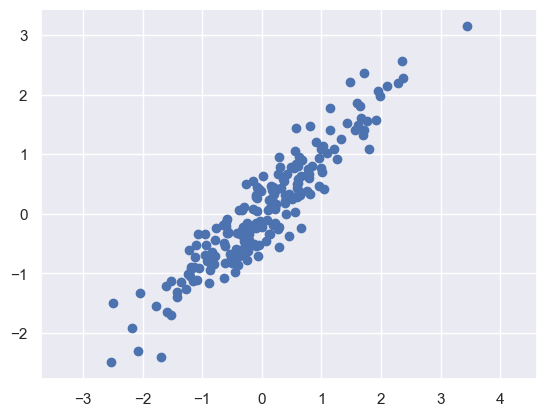

In [92]:
plt.scatter(X[:,0],X[:,1])
plt.axis("equal")

Data is correlated, what means that values are dependent on each other

In [93]:
from sklearn.decomposition import PCA
pca= PCA(n_components = 2)
pca.fit(X)
PCA(copy=True, n_components=2, whiten=False)

PCA(n_components=2)

In [94]:
print(pca.components_)

[[ 0.71295075  0.7012141 ]
 [-0.7012141   0.71295075]]


In [95]:
print(pca.explained_variance_)

[1.81976631 0.06383577]


In [97]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
    linewidth=2,
    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

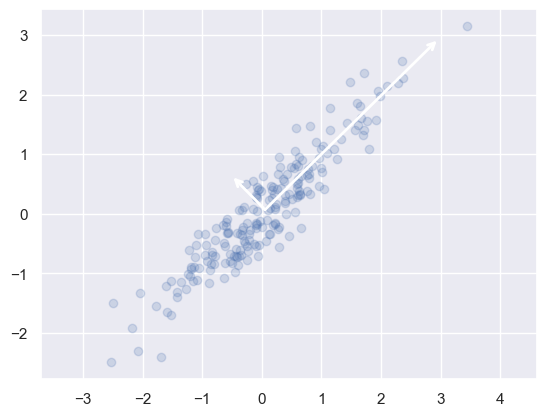

In [99]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for lenght, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(lenght)
    draw_vector(pca.mean_, pca.mean_ + v)
    plt.axis('equal');

the arrow from 0-3 is the strenght (variance) of the first feature and 0-0.5 is the strenght (variance) of the second feature. The second feature is much shorter than the first one.

I need to take those two features and extract the variances and build one feature which will hold all of the variances within it. 

In [100]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


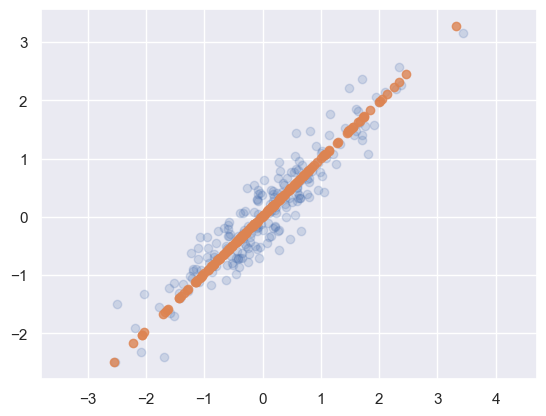

In [102]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

I reduced data from two features to the one feature. Two features are the blue dots and one feature is the orange dots. noise has been removed.  

In [103]:
from sklearn.datasets import load_digits
digits = load_digits()

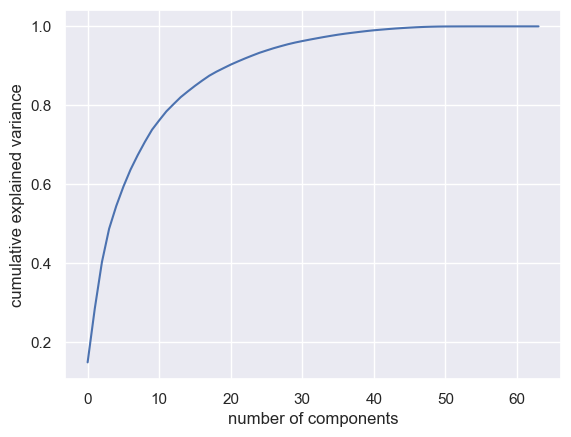

In [116]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [118]:
from sklearn.decomposition import PCA

In [119]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


I need to split data for independent variables (X) and dependent/targeted variables (y). 

In [124]:
X = df.drop(columns=["is_spam"])
y = df["is_spam"]

In [125]:
X.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


I need to find out how many features do I need in order to give me 99.5% variance.

In [126]:
X.shape

(4601, 57)

In [127]:
pca=PCA().fit(X)

ValueError: could not convert string to float: '???'

Text(0, 0.5, 'cumulative explained variance')

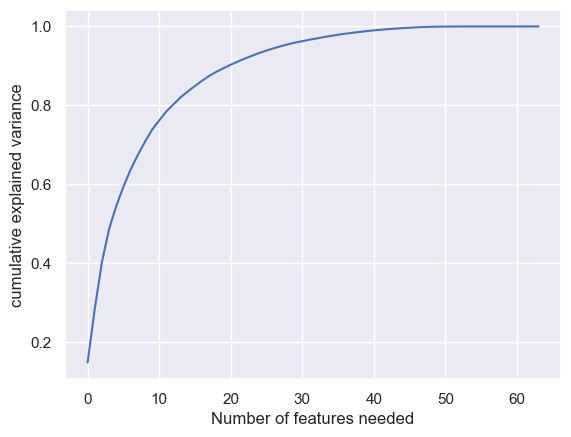

In [128]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of features needed")
plt.ylabel("cumulative explained variance")

We need around 35 features to get 99.5% of the variance

In [143]:
y=PCA(0.995)

In [145]:
pca=PCA(35)

In [154]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'is_spam')

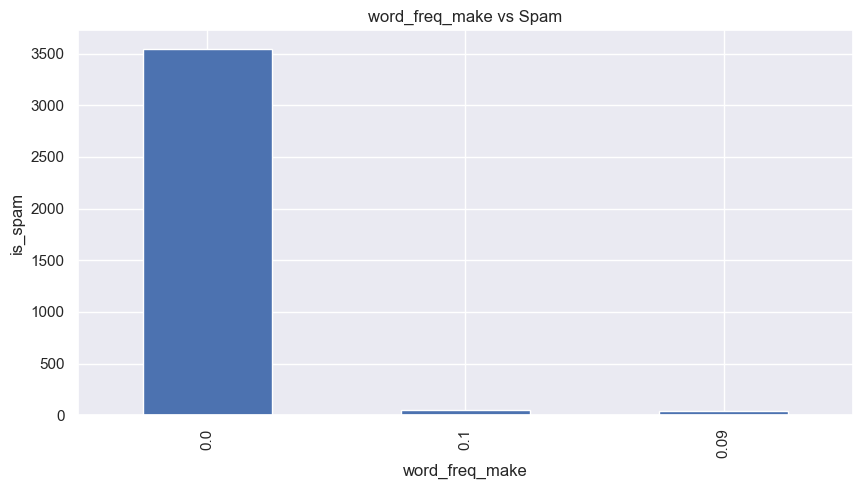

In [155]:
df["word_freq_make"].value_counts().nlargest(3).plot(kind="bar", figsize=(10,5))
plt.title("word_freq_make vs Spam")
plt.xlabel("word_freq_make")
plt.ylabel("is_spam")

Text(0, 0.5, 'is_spam')

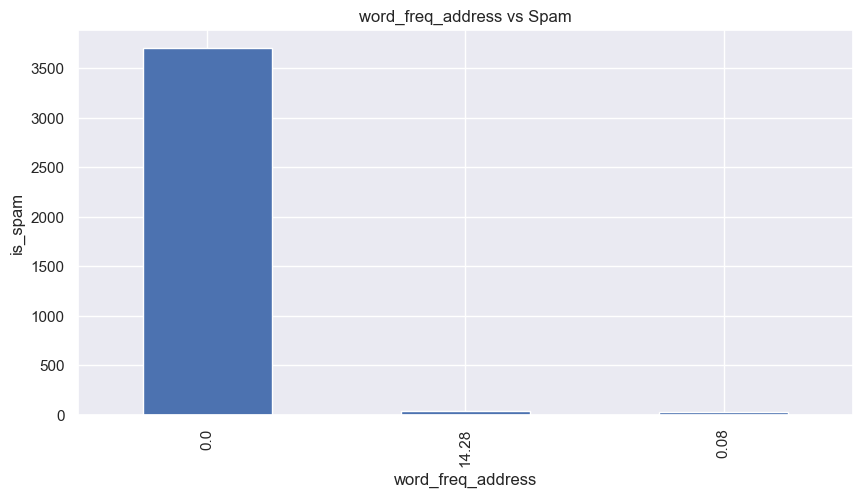

In [157]:
df["word_freq_address"].value_counts().nlargest(3).plot(kind="bar", figsize=(10,5))
plt.title("word_freq_address vs Spam")
plt.xlabel("word_freq_address")
plt.ylabel("is_spam")

Text(0, 0.5, 'is_spam')

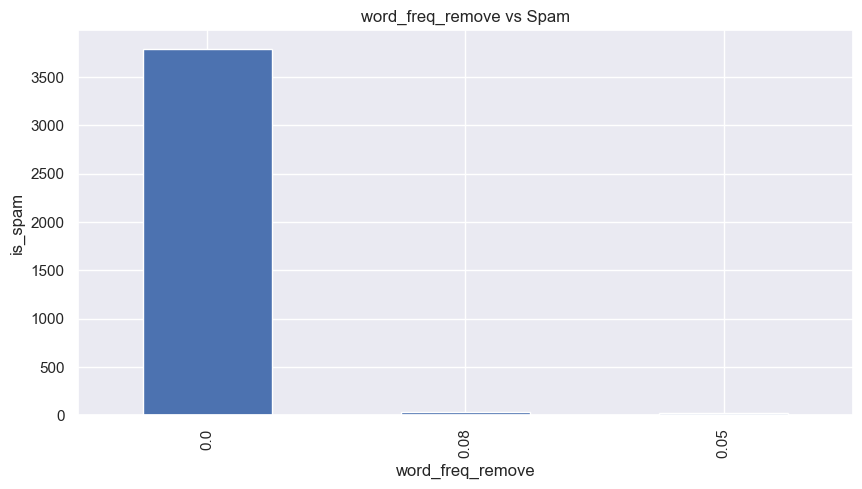

In [158]:
df["word_freq_remove"].value_counts().nlargest(3).plot(kind="bar", figsize=(10,5))
plt.title("word_freq_remove vs Spam")
plt.xlabel("word_freq_remove")
plt.ylabel("is_spam")

Text(0, 0.5, 'is_spam')

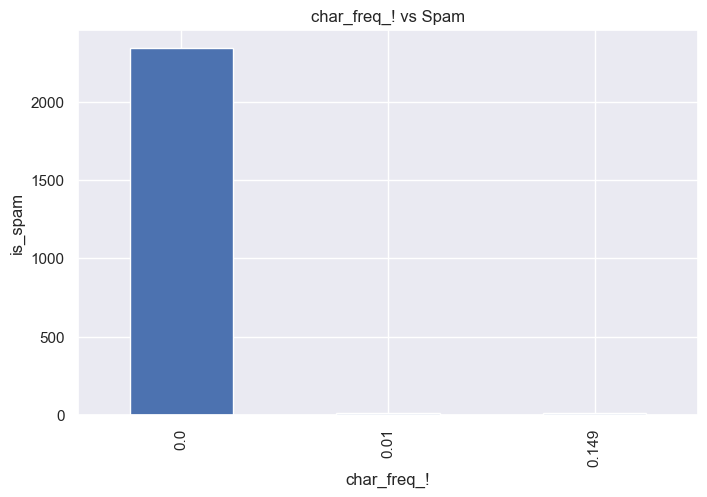

In [162]:
df["char_freq_!"].value_counts().nlargest(3).plot(kind="bar", figsize=(8,5))
plt.title("char_freq_! vs Spam")
plt.xlabel("char_freq_!")
plt.ylabel("is_spam")

Text(0, 0.5, 'is_spam')

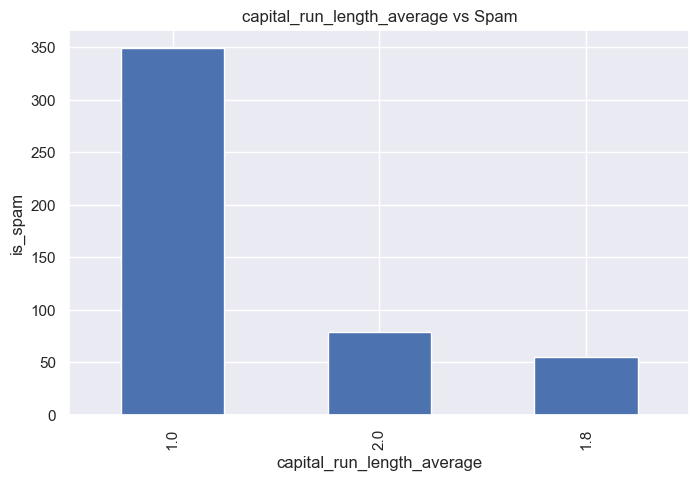

In [165]:
df["capital_run_length_average"].value_counts().nlargest(3).plot(kind="bar", figsize=(8,5))
plt.title("capital_run_length_average vs Spam")
plt.xlabel("capital_run_length_average")
plt.ylabel("is_spam")

Text(0, 0.5, 'is_spam')

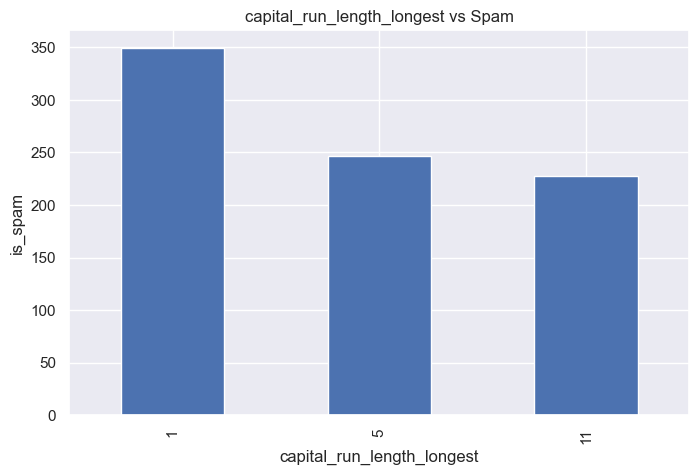

In [167]:
df["capital_run_length_longest"].value_counts().nlargest(3).plot(kind="bar", figsize=(8,5))
plt.title("capital_run_length_longest vs Spam")
plt.xlabel("capital_run_length_longest")
plt.ylabel("is_spam")

Text(0, 0.5, 'is_spam')

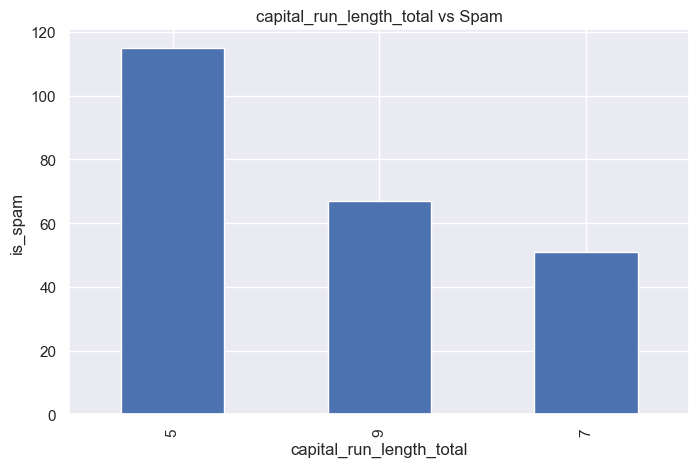

In [166]:
df["capital_run_length_total"].value_counts().nlargest(3).plot(kind="bar", figsize=(8,5))
plt.title("capital_run_length_total vs Spam")
plt.xlabel("capital_run_length_total")
plt.ylabel("is_spam")

I want to split features 0-48 and and 49-54 in one varaible and 55-57 to another variable

In [172]:
X = df.iloc[0:48,49:54]
y = df.iloc[55:57]

In [173]:
y

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
55,0.0,0.0,0.0,0.0,0,NaN,0.00,0.0,0.0,0.0,...,0.000,0.000,0.0,1.478,0.000,0.000,2.000,30,106,True
56,0.0,0.0,0.0,0.0,0,0.0,1.04,0.0,0.0,0.0,...,0.061,0.246,0.0,0.615,0.061,0.061,3.318,59,146,True


In [178]:
X = df.iloc[0:48,49:58]
y = df.iloc[59]

In [179]:
y

word_freq_make                  0.0
word_freq_address              0.42
word_freq_all                  1.68
word_freq_3d                    0.0
word_freq_our                  0.42
word_freq_over                  0.0
word_freq_remove                0.0
word_freq_internet              0.0
word_freq_order                 0.0
word_freq_mail                  0.0
word_freq_receive               0.0
word_freq_will                 0.42
word_freq_people                0.0
word_freq_report                0.0
word_freq_addresses             0.0
word_freq_free                 0.42
word_freq_business              0.0
word_freq_email                0.84
word_freq_you                   2.1
word_freq_credit                0.0
word_freq_your                 1.68
word_freq_font                  0.0
word_freq_000                     0
word_freq_money                 0.0
word_freq_hp                    0.0
word_freq_hpl                     0
word_freq_george                0.0
word_freq_650               

In [180]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [181]:
import seaborn as sns

In [182]:
df.info

<bound method DataFrame.info of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

     word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0             0.32         

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4595 non-null   float64
 3   word_freq_3d                4599 non-null   float64
 4   word_freq_our               4601 non-null   object 
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4586 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [185]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4595.000000,4599.000000,4600.000000,4601.000000,4586.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.281023,0.065453,0.095922,0.114208,0.105639,0.090067,0.239413,0.059824,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504370,1.395454,0.273850,0.391441,0.401682,0.278616,0.644755,0.201545,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,5.880000,7.270000,11.110000,5.260000,18.180000,2.610000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [186]:
import seaborn as sns

<Axes: xlabel='is_spam', ylabel='capital_run_length_longest'>

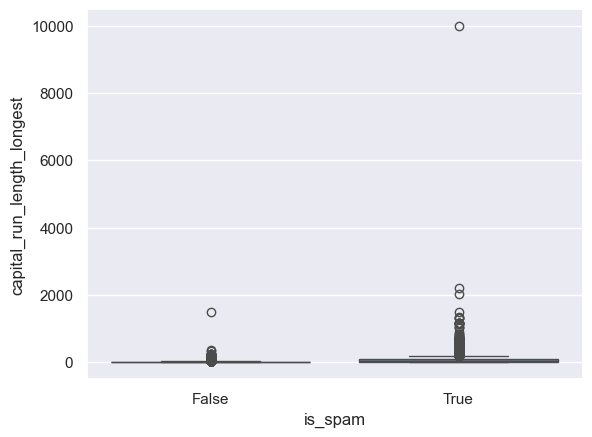

In [187]:
sns.boxplot(x="is_spam",y="capital_run_length_longest",data=df)

<Axes: xlabel='is_spam', ylabel='char_freq_#'>

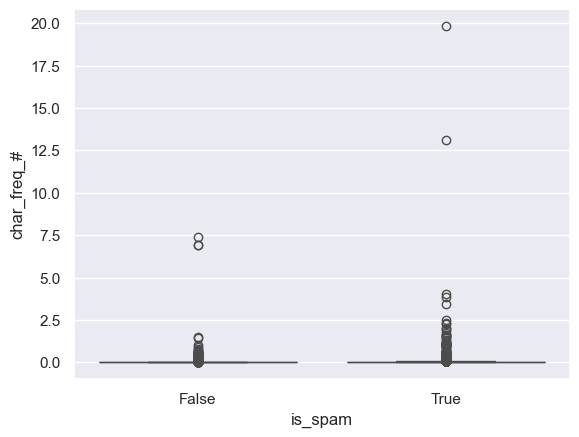

In [188]:
sns.boxplot(x="is_spam",y="char_freq_#",data=df)

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4595.000000,4599.000000,4600.000000,4601.000000,4586.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.281023,0.065453,0.095922,0.114208,0.105639,0.090067,0.239413,0.059824,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504370,1.395454,0.273850,0.391441,0.401682,0.278616,0.644755,0.201545,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,5.880000,7.270000,11.110000,5.260000,18.180000,2.610000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [191]:
df["is_spam"].head(10)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: is_spam, dtype: bool

In [193]:
df.describe()["char_freq_#"]

count    4601.000000
mean        0.044238
std         0.429342
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.829000
Name: char_freq_#, dtype: float64